In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%pip install openpyxl
from darts import TimeSeries

In [2]:
df = pd.read_excel('../../data/raw/Количество исследований по неделям (для реализации).xlsx')
df = df.rename(columns={"Год": "year", "Номер недели": "week"})
df.fillna(0, inplace = True)
df

,year,week,Денситометр,КТ,КТ с КУ 1 зона,КТ с КУ 2 и более зон,ММГ,МРТ,МРТ с КУ 1 зона,МРТ с КУ 2 и более зон,РГ,Флюорограф
0,2021,52,0.0,5895,0.0,0.0,22,8,0.0,0.0,2459,0.0
1,2022,1,17.0,6146,43.0,100.0,483,415,169.0,2.0,12450,392.0
2,2022,2,1026.0,10868,424.0,451.0,9567,2156,669.0,9.0,48904,22626.0
3,2022,3,910.0,12266,430.0,490.0,8791,2162,710.0,14.0,47364,20496.0
4,2022,4,679.0,12793,336.0,471.0,7465,2066,667.0,7.0,40234,15227.0
...,...,...,...,...,...,...,...,...,...,...,...,...
104,2023,52,1294.0,3313,491.0,476.0,14856,1327,715.0,11.0,81751,5979.0
105,2024,1,84.0,950,70.0,73.0,1185,544,131.0,1.0,16148,241.0
106,2024,2,1427.0,3317,431.0,369.0,13964,1461,593.0,12.0,80644,5394.0
107,2024,3,1816.0,3939,563.0,518.0,17769,1712,809.0,17.0,98705,6580.0


In [3]:
ds_index = pd.date_range("2021-12-24", "2024-1-28", freq="W", name="ds").to_frame().reset_index(drop=True)
ds_index["year"] = ds_index["ds"].dt.year
ds_index["week"] = ds_index["ds"].dt.isocalendar().week
ds_index

,ds,year,week
0,2021-12-26,2021,51
1,2022-01-02,2022,52
2,2022-01-09,2022,1
3,2022-01-16,2022,2
4,2022-01-23,2022,3
...,...,...,...
105,2023-12-31,2023,52
106,2024-01-07,2024,1
107,2024-01-14,2024,2
108,2024-01-21,2024,3


In [4]:
ds_index['week'][0] = 52
ds_index['week'][1] = 1
ds_index['week'][2:54] += 1
ds_index

/tmp/ipykernel_578155/844870316.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ds_index['week'][0] = 52
/tmp/ipykernel_578155/844870316.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting va

,ds,year,week
0,2021-12-26,2021,52
1,2022-01-02,2022,1
2,2022-01-09,2022,2
3,2022-01-16,2022,3
4,2022-01-23,2022,4
...,...,...,...
105,2023-12-31,2023,52
106,2024-01-07,2024,1
107,2024-01-14,2024,2
108,2024-01-21,2024,3


In [5]:
data = ds_index.merge(df, how="left", on=["year", "week"])
data[34:56]

,ds,year,week,Денситометр,КТ,КТ с КУ 1 зона,КТ с КУ 2 и более зон,ММГ,МРТ,МРТ с КУ 1 зона,МРТ с КУ 2 и более зон,РГ,Флюорограф
34,2022-08-21,2022,34,1059.0,4136.0,480.0,476.0,12199.0,1820.0,718.0,8.0,46641.0,20380.0
35,2022-08-28,2022,35,896.0,4131.0,444.0,456.0,12446.0,1798.0,786.0,7.0,46749.0,19369.0
36,2022-09-04,2022,36,974.0,4499.0,413.0,506.0,12262.0,1824.0,740.0,4.0,46779.0,18481.0
37,2022-09-11,2022,37,1020.0,4671.0,478.0,477.0,12730.0,1913.0,738.0,3.0,48811.0,18390.0
38,2022-09-18,2022,38,1219.0,4452.0,503.0,499.0,13203.0,1942.0,678.0,5.0,50648.0,20770.0
39,2022-09-25,2022,39,1020.0,4329.0,490.0,538.0,12206.0,1864.0,697.0,8.0,51754.0,19534.0
40,2022-10-02,2022,40,1230.0,4527.0,539.0,553.0,13509.0,2071.0,753.0,4.0,56081.0,20013.0
41,2022-10-09,2022,41,1055.0,4429.0,513.0,535.0,14145.0,2088.0,759.0,7.0,58698.0,20753.0
42,2022-10-16,2022,42,1124.0,4708.0,513.0,603.0,14159.0,2242.0,781.0,7.0,56580.0,21207.0
43,2022-10-23,2022,43,1199.0,4511.0,565.0,628.0,14690.0,2157.0,847.0,7.0,55710.0,21724.0


In [6]:
data.index
data.fillna(0, inplace=True)

In [7]:
series = TimeSeries.from_dataframe(data, time_col='ds', value_cols=[column for column in df.columns if column not in ['year', 'week']])
series

<TimeSeries (DataArray) (ds: 110, component: 10, sample: 1)> Size: 9kB
array([[[0.0000e+00],
        [5.8950e+03],
        [0.0000e+00],
        ...,
        [0.0000e+00],
        [2.4590e+03],
        [0.0000e+00]],

       [[1.7000e+01],
        [6.1460e+03],
        [4.3000e+01],
        ...,
        [2.0000e+00],
        [1.2450e+04],
        [3.9200e+02]],

       [[1.0260e+03],
        [1.0868e+04],
        [4.2400e+02],
        ...,
...
        ...,
        [1.2000e+01],
        [8.0644e+04],
        [5.3940e+03]],

       [[1.8160e+03],
        [3.9390e+03],
        [5.6300e+02],
        ...,
        [1.7000e+01],
        [9.8705e+04],
        [6.5800e+03]],

       [[2.1020e+03],
        [4.5330e+03],
        [5.3300e+02],
        ...,
        [1.7000e+01],
        [9.9858e+04],
        [7.5910e+03]]])
Coordinates:
  * ds         (ds) datetime64[ns] 880B 2021-12-26 2022-01-02 ... 2024-01-28
  * component  (component) object 80B 'Денситометр' 'КТ' ... 'РГ' 'Флюорограф'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [8]:
train, val = series[:-4], series[-4:]

In [9]:
val

<TimeSeries (DataArray) (ds: 4, component: 10, sample: 1)> Size: 320B
array([[[8.4000e+01],
        [9.5000e+02],
        [7.0000e+01],
        [7.3000e+01],
        [1.1850e+03],
        [5.4400e+02],
        [1.3100e+02],
        [1.0000e+00],
        [1.6148e+04],
        [2.4100e+02]],

       [[1.4270e+03],
        [3.3170e+03],
        [4.3100e+02],
        [3.6900e+02],
        [1.3964e+04],
        [1.4610e+03],
        [5.9300e+02],
        [1.2000e+01],
        [8.0644e+04],
...
        [3.9390e+03],
        [5.6300e+02],
        [5.1800e+02],
        [1.7769e+04],
        [1.7120e+03],
        [8.0900e+02],
        [1.7000e+01],
        [9.8705e+04],
        [6.5800e+03]],

       [[2.1020e+03],
        [4.5330e+03],
        [5.3300e+02],
        [5.6600e+02],
        [1.8770e+04],
        [1.8780e+03],
        [7.5500e+02],
        [1.7000e+01],
        [9.9858e+04],
        [7.5910e+03]]])
Coordinates:
  * ds         (ds) datetime64[ns] 32B 2024-01-07 2024-01-14 ... 2024-01-28
  * component  (component) object 80B 'Денситометр' 'КТ' ... 'РГ' 'Флюорограф'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [10]:
from sklearn.metrics import mean_absolute_percentage_error
def calc_mape_for_each_column_and_get_mean(val, pred):
    mape = {}
    for column in pred.columns:
        mape[column] = mean_absolute_percentage_error(val[column].values(), pred[column].values())
        print(column, " mape:", round(mape[column],3))

    print("mean mape: ", round(sum(mape.values()) / len(mape),3))
    #return mape


/home/akrylov/.conda/envs/hack_doctor_schedul/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Денситометр  mape: 0.664
КТ  mape: 0.245
КТ с КУ 1 зона  mape: 0.347
КТ с КУ 2 и более зон  mape: 0.227
ММГ  mape: 0.215
МРТ  mape: 0.201
МРТ с КУ 1 зона  mape: 0.183
МРТ с КУ 2 и более зон  mape: 0.699
РГ  mape: 0.251
Флюорограф  mape: 1.998
mean mape:  0.503


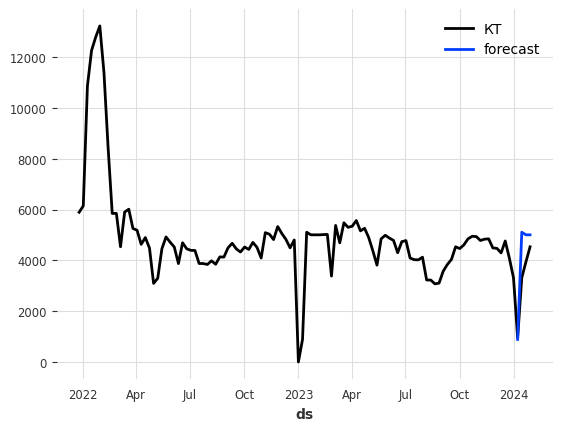

In [11]:
from darts.models.forecasting.baselines import NaiveSeasonal


model = NaiveSeasonal(K=52)
model.fit(train)
pred = model.predict(4)
pred

import matplotlib.pyplot as plt

series['КТ'].plot()
pred['КТ'].plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

calc_mape_for_each_column_and_get_mean(val, pred)

Денситометр  mape: 3.847
КТ  mape: 1.24
КТ с КУ 1 зона  mape: 1.777
КТ с КУ 2 и более зон  mape: 2.095
ММГ  mape: 2.805
МРТ  mape: 0.783
МРТ с КУ 1 зона  mape: 1.367
МРТ с КУ 2 и более зон  mape: 2.177
РГ  mape: 0.917
Флюорограф  mape: 21.295
mean mape:  3.83


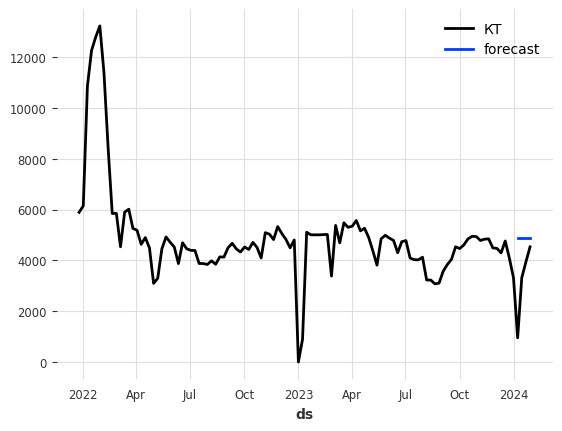

In [12]:
from darts.models import NaiveMean
model = NaiveMean()
model.fit(train)
pred = model.predict(4)
pred

import matplotlib.pyplot as plt

series['КТ'].plot()
pred['КТ'].plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

calc_mape_for_each_column_and_get_mean(val, pred)

In [22]:
from darts.models import NaiveMean
from darts.models import NaiveDrift
from darts.models import NaiveMovingAverage
from darts.models import LinearRegressionModel


models = {
    'Naive_mean': NaiveMean() , 
    'Naive_seasonal_K52': NaiveSeasonal(K=52), 
    'Naive_seasonal_K26': NaiveSeasonal(K=26), 
    'Naive_seasonal_K13': NaiveSeasonal(K=13), 
    'Naive_drift': NaiveDrift(),
    'Naive_MovingAverage': NaiveMovingAverage(input_chunk_length=12),
    'LinearRegressionModel_lags52': LinearRegressionModel(lags=52),
    'LinearRegressionModel_lags100': LinearRegressionModel(lags=100),
}
from sklearn.metrics import mean_absolute_percentage_error


def calc_mape_for_each_column_and_get_mean(val, pred):
    mape = {}
    for column in pred.columns:
        mape[column] = mean_absolute_percentage_error(val[column].values(), pred[column].values())
        #print(column, " mape:", round(mape[column],3))
    mape['СРЕДНЕЕ ПО ВСЕМ'] = round(sum(mape.values()) / len(mape),3)
    #print("mean mape: ", round(sum(mape.values()) / len(mape),3))
    return mape

results = {}
for name, model in models.items():
    model.fit(train)
    pred = model.predict(4)
    results[name] = calc_mape_for_each_column_and_get_mean(val, pred)

results
print('MAPE METRIC')
pd.DataFrame(results)


MAPE METRIC


,Naive_mean,Naive_seasonal_K52,Naive_seasonal_K26,Naive_seasonal_K13,Naive_drift,Naive_MovingAverage,LinearRegressionModel_lags52,LinearRegressionModel_lags100
Денситометр,3.847420,0.663823,4.088958,4.671818,3.813859,5.266441,1.465109,4.236820
КТ,1.240107,0.245372,0.908136,1.164848,0.736501,1.078359,0.949162,0.774756
КТ с КУ 1 зона,1.776963,0.346711,2.356608,2.298653,1.597168,2.142133,0.540806,1.765030
КТ с КУ 2 и более зон,2.094608,0.226848,2.827749,3.182268,1.519748,2.807012,0.727340,1.906003
ММГ,2.804717,0.215053,3.426649,3.781596,3.014636,3.836357,2.006746,3.286117
МРТ,0.783476,0.200682,0.859774,1.036360,0.501616,0.950603,0.236839,0.546253
МРТ с КУ 1 зона,1.366667,0.183188,1.835619,1.667961,1.211635,1.672812,0.474927,1.370505
МРТ с КУ 2 и более зон,2.177187,0.698529,2.419118,2.077206,2.708345,3.902376,3.259001,2.994911
РГ,0.917370,0.250719,0.981818,1.018644,1.110430,1.126606,0.680752,1.118386
Флюорограф,21.294685,1.998388,20.062879,18.193147,6.105675,14.907200,1.553817,8.576423


In [14]:
1
0
0
0
0
2
------- 3

array([[1.81850000e+03, 4.55150000e+03, 6.23333333e+02, 7.62000000e+02,
        1.88790833e+04, 2.15475000e+03, 9.00083333e+02, 1.61666667e+01,
        8.33837500e+04, 1.38178333e+04],
       [1.82654167e+03, 4.52687500e+03, 6.16861111e+02, 7.52750000e+02,
        1.88810903e+04, 2.14981250e+03, 9.00673611e+02, 1.62638889e+01,
        8.38953958e+04, 1.36772361e+04],
       [1.82817014e+03, 4.49178125e+03, 6.12682870e+02, 7.49812500e+02,
        1.88380145e+04, 2.13229688e+03, 9.01646412e+02, 1.62858796e+01,
        8.41715122e+04, 1.33735058e+04],
       [1.82818432e+03, 4.45459635e+03, 6.09906443e+02, 7.37046875e+02,
        1.87432657e+04, 2.11182161e+03, 8.96200280e+02, 1.62263696e+01,
        8.43657215e+04, 1.30967979e+04]])

In [15]:
import matplotlib.pyplot as plt

series['КТ'].plot()
pred['КТ'].plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

3.768989708512342

In [ ]:
pred